# Implementación del PSO gbest
Se comienza por importar las librerias con algunas utilidades como manejo de arreglos, numeros aleatorios y funciones de prueba

In [1]:
# Manejo de arreglos y operaciones matematicas
import numpy as np

# Importar funciones
import import_ipynb
from utils import FuncionesObjetivo as f

# Numeros aleatorios
import random


import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib notebook

importing Jupyter notebook from /Users/isaacg/Desktop/Maestría/Primer_Semestre/Algoritmos_Bioinspirados/PSO/utils/FuncionesObjetivo.ipynb


## Implementacion de funciones
Ahora se implementan funciones que se usaran en la implementacion del algoritmo

In [2]:
def pg_best(X, y, y_hat, X_ft, y_ft, y_hat_ft):
    """
    Esta funcion actualiza el personal best de cada particula y el global best
    - input: 
        - X: poblacion
        - y: personal best actual de cada particula
        - y_hat: global best
        - X_ft: fitness de la poblacion
        - y_ft: fitness del personal best
        - y_hat_ft: fitness del mejor global
    - output: personal best y global best actualizados
    """
    # Obtener el indice de las particulas donde su nueva posicion es mejor que su personal best
    idx_mejoresp = np.where(X_ft < y_ft)
    
    # Actualizar personal best
    y[idx_mejoresp] = X[idx_mejoresp]
    
    # Si se encuentra un valor mejor en la poblacion actualizada, se cambia el gbest
    if np.min(X_ft) < y_hat_ft:
        y_hat = X[[np.argmin(X_ft)]]
    
    return y, y_hat

def actualizar_vel(v, X, y, y_hat, c1, c2):
    """
    Esta funcion actualiza la velocidad de las particulas
    - input:
        - v: velocidad actual de las particulas
        - X: posicion actual de las particulas
        - y: personal best de cada particula
        - y_hat: global best
        - c1, c2: constantes para peso de la componente personal y social
    - output: velocidad actualizada de cada particula
    """
    # Calcular nueva velocidad
    v += (c1 * np.random.uniform(0, 1, (len(X), 1)) * (y - X)) + (c2 * np.random.uniform(0, 1, (len(X), 1)) * (y_hat - X))
    
    return v

## Definir Hiperparametros del algoritmo

In [63]:
d = 1  # Numero de dimensiones
n = 100  # Numero de particulas
rango = [[-10, 10]]  # Rango de las variables
c1 = 0.5  # Peso para personal best
c2 = 0.3  # Peso social
funcion = f.f_spherical # funcion objetivo
max_gen = 100  # Maximo de generaciones
animacion = True  # Realizar animacion o no
tol = 1e-3  # Tolerancia para detener el algoritmo

## Implementación del algoritmo

El óptimo está en [-0.] con un fitness de 0.0000
Obtenido en la generación 100


<IPython.core.display.Javascript object>


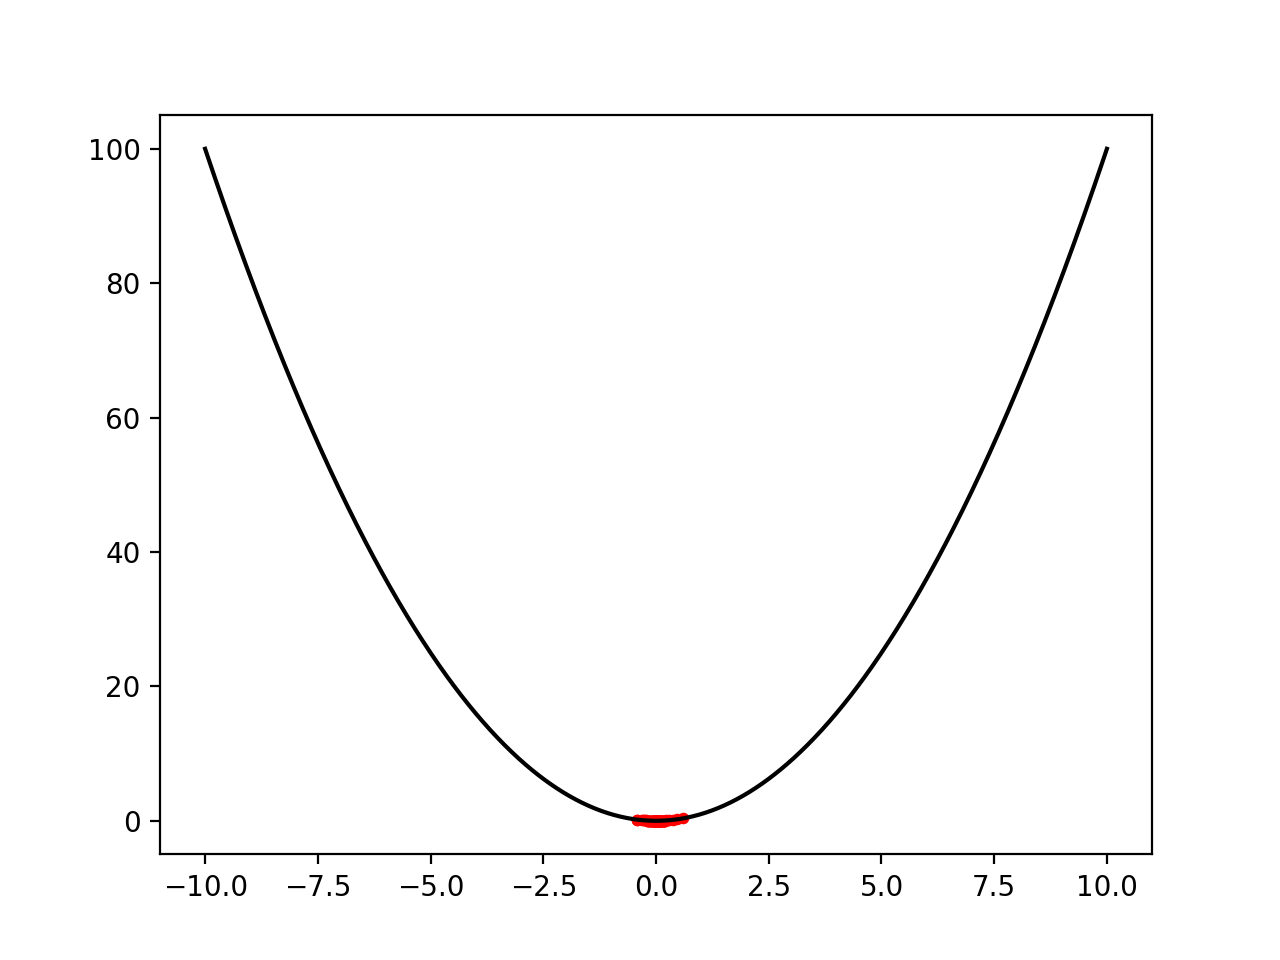

In [64]:
# Si solo hay un rango se considera el mismo rango para todas las variables
if len(rango) == 1:
    rango *= d
# Convertir rango a np.array
rango = np.array(rango)

# Definimos un mejor fitness grande para iniciar el algoritmo
mejor_fitness= np.infty
gen = 0

# Crear un vetor de soluciones para cada dimension con su rango dado
X = np.random.uniform(low=rango[:, 0], high=rango[:,1], size=((n, d)))
    
# El personal best se inicializa con la poblacion ya que no ha habido actualizacion
y = X.copy() 

# Inicializar el global best con el minimo de la poblacion inicial
y_hat = X[[np.argmin(funcion(X))]]

# Incializar aleatoriamente la velocidad de las particulas
v = np.random.uniform(low=rango[:, 0], high=rango[:,1], size=((n, d)))

# Variable para guardar la historia de cada generacion (para animar)
historia = []

# Seguir con el algoritmo mientra sean menos de 200 generaciones o el fitness sea menor a 0.001
while((mejor_fitness > tol) and (gen < max_gen)):
    # Calcular el fitness del personal best
    y_ft = funcion(y)
    
    # Fitness del mejor global
    y_hat_ft = funcion(y_hat)
    
    # Fitness de la poblacion
    X_ft = funcion(X)
    
    # Guardar la posicion de la generacion actual si se va a animar
    if animacion:
        img = np.hstack((y, y_ft.reshape(-1, 1)))
        historia.append(img)
    
    # Actualizar el personal y global best
    y, y_hat = pg_best(X, y, y_hat, X_ft, y_ft, y_hat_ft)
    
    # Actualizar velocidad
    v = actualizar_vel(v, X, y, y_hat, c1, c2)
    
    # Actualizar la posicion de las particulas
    X += v
    
    # Clipear para evitar que los valores se salgan del rango
    X = np.clip(X, a_min=rango[:, 0], a_max=rango[:, 1])
    
    # Aumentar la generacion
    gen += 1
    
# Una vez concluido el algoritmo se muestran los resultados
print(f"El óptimo está en {np.around(y_hat[0], 3)} con un fitness de {funcion(y_hat)[0]:0.4f}")
print(f"Obtenido en la generación {gen}")

# Graficar la funcion con su minimo menos para colville
if funcion != f.f_colville and not animacion:
    fig, ax = f.graficar(funcion, rango=rango, n_dims=d, mark=list(y_hat[0])+[funcion(y_hat)[0]])
    
elif animacion:
    anim = realizar_animacion(historia, funcion, rango, d, mark=None)

In [56]:
def animar(i, data, plot):
    """
    Funcion para realizar la animacion
     - input: 
         - i: numero de iteracion
         - data: generacion a graficar
         - plot: esqueleto del scatter
    """
    gen_actual = data[i]
    if gen_actual.shape[1] == 3:
        plot._offsets3d = gen_actual.T
    else:
        plot.set_offsets(gen_actual)
    return plot

In [58]:
def realizar_animacion(historia, funcion, rango, d, mark=None):
    """
    Esta funcion realiza una animacion de la evolucion del algoritmo
    - input:
        - historia: lista con la poblacion en cada iteracion y su fitness
        - funcion: funcion que se esta graficando
        - rango: rango en el que se grafica la funcion
        - d: dimension del problema
        - mark: posicion del minimo (si se conoce)
    """
    # Numero de iteraciones
    n = len(historia)
    
    # Graficar 3D
    if d == 2:
        # Graficar la superficie
        fig, ax = f.graficar(funcion, rango=rango, n_dims=d, alpha=0.3)
        
        # Graficar el optimo si se conoce
        if mark is not None:
            ax.scatter([mark[0]], [mark[1]], [mark[2]], color="g", marker="x")
        
        # Colocar el esqueleto del scatter para la animacinon
        plot = ax.scatter(xs=[], ys=[], zs=[], c="black", alpha=0.6, s=5)
        
        # Realizar la animacion
        anim = animation.FuncAnimation(
                    fig=fig,
                    func=animar,
                    frames=n,
                    fargs=(historia, plot),
                    interval=20,
                    repeat=False)
        return anim
    
    # Graficar 2D
    elif d == 1:
        # Graficar la superficie
        fig, ax = f.graficar(funcion, rango=rango, n_dims=d, alpha=0.3)
        
        # Graficar el optimo si se conoce
        if mark is not None:
            ax.scatter([mark[0]], [mark[1]], color="b", marker="x")
            
        # Colocar el esqueleto del scatter para la animacinon
        plot = ax.scatter(x=[], y=[], c="r", s=10)
        
        # Realizar la animacion
        anim = animation.FuncAnimation(
                    fig=fig,
                    func=animar,
                    frames=n,
                    fargs=(historia, plot),
                    interval=20,
                    repeat=False)
        return anim
    else:
        print("Solo se pueden animar graficas en 3 o menos dimensiones")

<IPython.core.display.Javascript object>


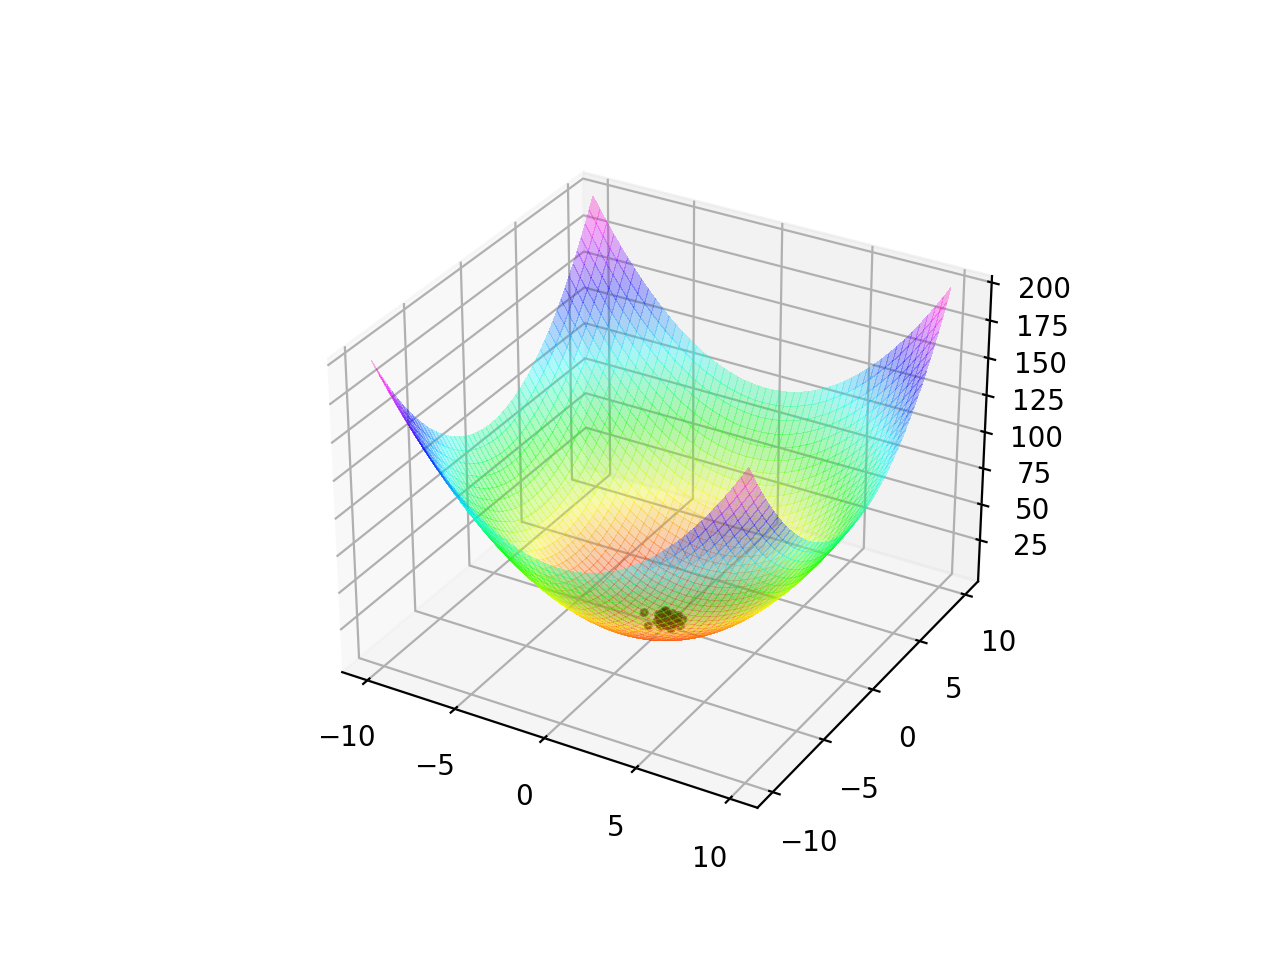

In [61]:
realizar_animacion(historia, funcion, rango, d, mark=None)

In [34]:
# TODO:
 # Checar si la transposcion es lo qeu hace que al final diverja